## 1. Data Exploration/Cleaning
- Checking null values
- Remove outliers

## 2. Features Selection 
- Filter Method - Correlation Matrix
- Wrapper Method - Recursive Method
- Embedded Method - XGBoost Feature Importance


## 3.	Models 
- Ridge Regression
- LASSO Regression
- Elastic Net Regression
- Decision Tree
- Random Forest
- XGBoost

## 4.	Models Evaluation
- RMSE (Root Mean Squred Error)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy import stats
from scipy.stats import norm


from sklearn.preprocessing import StandardScaler
from sklearn import ensemble, tree, linear_model
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
from IPython.display import display
pd.options.display.max_columns=None
df=df.reindex_axis(sorted(df.columns),axis=1)
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,GLQ,Unf,1,0,Gd,150,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,NaN,0,PConc,2,Typ,548,2,TA,RFn,TA,Attchd,2003.0,1710,1,GasA,Ex,2Story,1,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,NaN,0,2,CollgCr,61,5,7,Y,0,NaN,CompShg,Gable,Normal,208500,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,ALQ,Unf,0,1,Gd,284,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,1,CBlock,2,Typ,460,2,TA,RFn,TA,Attchd,1976.0,1262,0,GasA,Ex,1Story,2,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,NaN,0,5,Veenker,0,8,6,Y,0,NaN,CompShg,Gable,Normal,181500,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,GLQ,Unf,1,0,Gd,434,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,608,2,TA,RFn,TA,Attchd,2001.0,1786,1,GasA,Ex,2Story,3,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,NaN,0,9,CollgCr,42,5,7,Y,0,NaN,CompShg,Gable,Normal,223500,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,ALQ,Unf,1,0,TA,540,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,NaN,Gd,1,BrkTil,1,Typ,642,3,TA,Unf,TA,Detchd,1998.0,1717,0,GasA,Gd,2Story,4,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,NaN,0,2,Crawfor,35,5,7,Y,0,NaN,CompShg,Gable,Abnorml,140000,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,GLQ,Unf,1,0,Gd,490,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,TA,1,PConc,2,Typ,836,3,TA,RFn,TA,Attchd,2000.0,2198,1,GasA,Ex,2Story,5,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,NaN,0,12,NoRidge,84,5,8,Y,0,NaN,CompShg,Gable,Normal,250000,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [4]:
df.shape

(1460, 81)

### Remove "Id" from dataset

In [5]:
df=df.drop(columns=['Id'])

In [6]:
df.shape

(1460, 80)

## Log Transformation of "SalePrice'

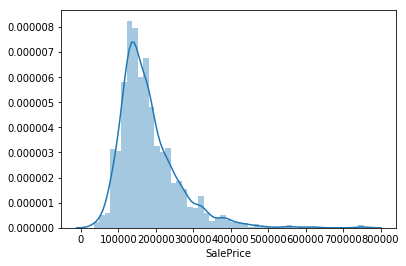

In [7]:
y=df['SalePrice']
sns.distplot(y)

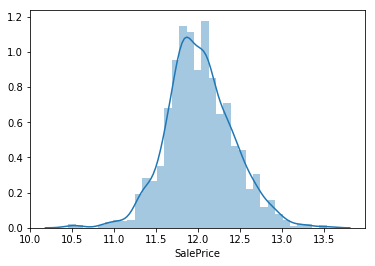

In [8]:
sns.distplot(np.log(y))

In [9]:
df['SalePrice']=np.log(df['SalePrice'])

In [10]:
df.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtQual          object
BsmtUnfSF          int64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64
MoSold             int64


## Data Cleaning

### Checking NAs

In [11]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageQual        81
GarageFinish      81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [12]:
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [13]:
featureName=dg.index.values
featureName

array(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageQual',
       'GarageFinish', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
       'BsmtQual', 'BsmtFinType1', 'BsmtCond', 'MasVnrArea', 'MasVnrType',
       'Electrical'], dtype=object)

In [14]:
def missingness(featureName):
    for i in featureName:
        print(i)
        print(df[i].value_counts(dropna=False))
        print("Value missing: %2.1f %%" % (df[i].isnull().sum()/len(df)*100))
        print()

### Checking unique values of feature with more than 70% missning values

In [15]:
missingness(featureName)

PoolQC
NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64
Value missing: 99.5 %

MiscFeature
NaN     1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64
Value missing: 96.3 %

Alley
NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64
Value missing: 93.8 %

Fence
NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64
Value missing: 80.8 %

FireplaceQu
NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64
Value missing: 47.3 %

LotFrontage
NaN       259
 60.0     143
 70.0      70
 80.0      69
 50.0      57
 75.0      53
 65.0      44
 85.0      40
 78.0      25
 21.0      23
 90.0      23
 68.0      19
 24.0      19
 64.0      19
 73.0      18
 72.0      17
 79.0      17
 63.0      17
 55.0      17
 100.0     16
 51.0      15
 66.0      15
 74.0      15
 52.0      14
 59.0      13
 71.0      12
 67.0      12
 57.0      12
 82.0  

### Remove columns with more than 70% of missing values

In [16]:
df=df.drop(columns=['PoolQC','MiscFeature','Alley','Fence'])

In [17]:
df.shape

(1460, 76)

### Checking the rest of features with missing values

In [18]:
null_cols=df.columns[df.isnull().any()]
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
print(dg)
nullCol=dg.index.values
nullCol

FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


array(['FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageType',
       'GarageQual', 'GarageFinish', 'GarageCond', 'BsmtFinType2',
       'BsmtExposure', 'BsmtQual', 'BsmtFinType1', 'BsmtCond',
       'MasVnrType', 'MasVnrArea', 'Electrical'], dtype=object)

### It looks like "FireplaceQu" has "NaN" value when "Fireplaces" has "zero" value. 
### Let's check if the number of missing value in "FireplaceQu" is the same as the number of rows with zero value in "Fireplaces"

In [19]:
df['FireplaceQu'].isnull().sum()

690

In [20]:
len(df.loc[df['Fireplaces']==0])

690

### It turns out the number is the same. 
### We can go ahead and replace the "NaN" in "FireplaceQu" with "0"

### Also, we will change the datatype of "FireplaceQu" to a "Ordinal" Variable

### First we will need to replace "NaN" with "0" value

In [21]:
df['FireplaceQu'].fillna(0,inplace=True)

In [22]:
df['FireplaceQu'].value_counts()

0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

### Replace string values to ordinal value in "FireplaceQu"

In [23]:
#quality={'Po':1,'Fa':2,'TA':3,'Gd':4,"Ex":5}
df.FireplaceQu[df.FireplaceQu=='Po']=1
df.FireplaceQu[df.FireplaceQu=='Fa']=2
df.FireplaceQu[df.FireplaceQu=='TA']=3
df.FireplaceQu[df.FireplaceQu=='Gd']=4
df.FireplaceQu[df.FireplaceQu=='Ex']=5

In [24]:
df.FireplaceQu.dtypes

dtype('O')

### Let's change the datatype of "FireplaceQu" to "int"

In [25]:
df=df.astype({"FireplaceQu":int})

In [26]:
df.FireplaceQu.dtypes

dtype('int32')

In [27]:
df['LotFrontage'].isnull().sum()

259

### Some Lot just does not have LotFronage.
### Change "NaN" value to "zero" in "LotFrontage"

In [28]:
df['LotFrontage'].fillna(0,inplace=True)

### Check if the number of "0" value is the same as the number "NaN" value

In [29]:
df['LotFrontage'].value_counts()

0.0      259
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
67.0      12
57.0      12
82.0      12
43.0      12
        ... 
129.0      2
313.0      2
118.0      2
122.0      2
121.0      2
101.0      2
109.0      2
115.0      2
116.0      2
114.0      2
153.0      1
149.0      1
150.0      1
111.0      1
182.0      1
46.0       1
112.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

### Double check all the missing values again 

In [30]:
null_cols=df.columns[df.isnull().any()]
df[null_cols].isnull().sum().sort_values(ascending=False)
dg=(df[null_cols].isnull().sum()/len(df)*100).sort_values(ascending=False)
dg

GarageYrBlt     5.547945
GarageType      5.547945
GarageQual      5.547945
GarageFinish    5.547945
GarageCond      5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtFinType1    2.534247
BsmtCond        2.534247
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### All the remaining variables have less than 6% of missing values.
### We will remove all the rows with any missing values.

In [31]:
df_miss=df.dropna()

In [32]:
df_miss.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFinType1     0
BsmtFinType2     0
BsmtFullBath     0
BsmtHalfBath     0
BsmtQual         0
BsmtUnfSF        0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
EnclosedPorch    0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
Functional       0
GarageArea       0
                ..
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SalePrice        0
SaleType         0
ScreenPorch 

In [33]:
df_miss.shape

(1338, 76)

In [34]:
len(df)-len(df_miss)

122

### Checking the percentage of data removed

In [35]:
(len(df)-len(df_miss))/len(df)*100

8.356164383561644

## Convert all string categorical variables to ordinal categorical variables

In [36]:
cat_col=df_miss.select_dtypes(include=['object']).columns
cat_col
for item1 in cat_col:
    df_mean=pd.concat([df_miss[item1],df_miss['SalePrice']],axis=1)
    df_mean.head()

    g1=df_mean.groupby(item1).mean()
    g1

    df_g1=pd.DataFrame()
    df_g1=pd.DataFrame(g1)
    df_g1

    df_g2=df_g1.sort_values('SalePrice')
    df_g2

    df_g2.index

    g_col=df_g2.index.values

    df_miss[item1].value_counts()

    i=0
    for item2 in g_col:
        df_miss.loc[df_miss[item1]==item2,item1]=i
        i=i+1

In [37]:
df_miss[cat_col].dtypes

BldgType         int64
BsmtCond         int64
BsmtExposure     int64
BsmtFinType1     int64
BsmtFinType2     int64
BsmtQual         int64
CentralAir       int64
Condition1       int64
Condition2       int64
Electrical       int64
ExterCond        int64
ExterQual        int64
Exterior1st      int64
Exterior2nd      int64
Foundation       int64
Functional       int64
GarageCond       int64
GarageFinish     int64
GarageQual       int64
GarageType       int64
Heating          int64
HeatingQC        int64
HouseStyle       int64
KitchenQual      int64
LandContour      int64
LandSlope        int64
LotConfig        int64
LotShape         int64
MSZoning         int64
MasVnrType       int64
Neighborhood     int64
PavedDrive       int64
RoofMatl         int64
RoofStyle        int64
SaleCondition    int64
SaleType         int64
Street           int64
Utilities        int64
dtype: object

In [38]:
for item in cat_col:
    print(df_miss[item].value_counts())
    print()

4    1138
3     112
1      38
2      28
0      22
Name: BldgType, dtype: int64

2    1237
3      62
1      38
0       1
Name: BsmtCond, dtype: int64

0    887
2    213
3    127
1    111
Name: BsmtExposure, dtype: int64

5    402
4    392
3    209
1    141
0    125
2     69
Name: BsmtFinType1, dtype: int64

3    1176
1      53
2      46
0      32
5      19
4      12
Name: BsmtFinType2, dtype: int64

1    594
2    592
3    120
0     32
Name: BsmtQual, dtype: int64

1    1277
0      61
Name: CentralAir, dtype: int64

4    1162
2      63
0      43
3      26
7      19
1      10
8       8
6       5
5       2
Name: Condition1, dtype: int64

4    1324
2       5
6       2
1       2
0       2
7       1
5       1
3       1
Name: Condition2, dtype: int64

4    1242
3      76
2      17
1       2
0       1
Name: Electrical, dtype: int64

2    1183
1     137
0      16
3       2
Name: ExterCond, dtype: int64

1    803
2    477
3     51
0      7
Name: ExterQual, dtype: int64

10    486
6     211
3     

In [39]:
df_miss.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,4,2,0,706,0,5,3,1,0,2,150,1,4,4,4,0,2,2,10,12,0,0,4,2,6,548,2,4,1,2,4,2003.0,1710,1,3,4,6,1,2,1,0,8450,0,65.0,0,0,60,3,196.0,2,0,2,15,61,5,7,2,0,2,1,4,12.247694,4,0,1,8,856,1,0,2003,2003,2008
1,1262,0,0,3,4,2,3,978,0,3,3,0,1,2,284,1,2,4,4,0,2,1,3,3,3,1,1,2,6,460,2,4,1,2,4,1976.0,1262,0,3,4,5,1,1,1,0,9600,2,80.0,0,0,20,3,0.0,1,0,5,20,0,8,6,2,0,2,1,4,12.109011,4,0,1,6,1262,1,298,1976,1976,2007
2,920,866,0,3,4,2,1,486,0,5,3,1,0,2,434,1,4,4,4,0,2,2,10,12,3,1,4,2,6,608,2,4,1,2,4,2001.0,1786,1,3,4,6,1,2,1,0,11250,0,68.0,1,0,60,3,162.0,2,0,9,15,42,5,7,2,0,2,1,4,12.317167,4,0,1,6,920,1,0,2001,2002,2008
3,961,756,0,3,4,3,0,216,0,3,3,1,0,1,540,1,4,4,4,272,2,1,4,7,4,1,0,1,6,642,3,4,0,2,1,1998.0,1717,0,3,3,6,1,2,1,0,9550,1,60.0,1,0,70,3,0.0,1,0,2,17,35,5,7,2,0,2,1,1,11.849398,4,0,1,7,756,1,0,1915,1970,2006
4,1145,1053,0,4,4,2,2,655,0,5,3,1,0,2,490,1,4,4,4,0,2,2,10,12,3,1,4,2,6,836,3,4,1,2,4,2000.0,2198,1,3,4,6,1,2,1,0,14260,2,84.0,1,0,60,3,350.0,2,0,12,24,84,5,8,2,0,2,1,4,12.429216,4,0,1,9,1145,1,192,2000,2000,2008


## Start working on Outliers

In [40]:
df_miss.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,4,2,0,706,0,5,3,1,0,2,150,1,4,4,4,0,2,2,10,12,0,0,4,2,6,548,2,4,1,2,4,2003.0,1710,1,3,4,6,1,2,1,0,8450,0,65.0,0,0,60,3,196.0,2,0,2,15,61,5,7,2,0,2,1,4,12.247694,4,0,1,8,856,1,0,2003,2003,2008
1,1262,0,0,3,4,2,3,978,0,3,3,0,1,2,284,1,2,4,4,0,2,1,3,3,3,1,1,2,6,460,2,4,1,2,4,1976.0,1262,0,3,4,5,1,1,1,0,9600,2,80.0,0,0,20,3,0.0,1,0,5,20,0,8,6,2,0,2,1,4,12.109011,4,0,1,6,1262,1,298,1976,1976,2007
2,920,866,0,3,4,2,1,486,0,5,3,1,0,2,434,1,4,4,4,0,2,2,10,12,3,1,4,2,6,608,2,4,1,2,4,2001.0,1786,1,3,4,6,1,2,1,0,11250,0,68.0,1,0,60,3,162.0,2,0,9,15,42,5,7,2,0,2,1,4,12.317167,4,0,1,6,920,1,0,2001,2002,2008
3,961,756,0,3,4,3,0,216,0,3,3,1,0,1,540,1,4,4,4,272,2,1,4,7,4,1,0,1,6,642,3,4,0,2,1,1998.0,1717,0,3,3,6,1,2,1,0,9550,1,60.0,1,0,70,3,0.0,1,0,2,17,35,5,7,2,0,2,1,1,11.849398,4,0,1,7,756,1,0,1915,1970,2006
4,1145,1053,0,4,4,2,2,655,0,5,3,1,0,2,490,1,4,4,4,0,2,2,10,12,3,1,4,2,6,836,3,4,1,2,4,2000.0,2198,1,3,4,6,1,2,1,0,14260,2,84.0,1,0,60,3,350.0,2,0,12,24,84,5,8,2,0,2,1,4,12.429216,4,0,1,9,1145,1,192,2000,2000,2008


In [41]:
df_miss.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
BedroomAbvGr       int64
BldgType           int64
BsmtCond           int64
BsmtExposure       int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtFinType1       int64
BsmtFinType2       int64
BsmtFullBath       int64
BsmtHalfBath       int64
BsmtQual           int64
BsmtUnfSF          int64
CentralAir         int64
Condition1         int64
Condition2         int64
Electrical         int64
EnclosedPorch      int64
ExterCond          int64
ExterQual          int64
Exterior1st        int64
Exterior2nd        int64
FireplaceQu        int32
Fireplaces         int64
Foundation         int64
FullBath           int64
Functional         int64
GarageArea         int64
                  ...   
LotConfig          int64
LotFrontage      float64
LotShape           int64
LowQualFinSF       int64
MSSubClass         int64
MSZoning           int64
MasVnrArea       float64
MasVnrType         int64
MiscVal            int64


### Select continuous variables

In [42]:
df_miss.select_dtypes(exclude=['object']).head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,4,2,0,706,0,5,3,1,0,2,150,1,4,4,4,0,2,2,10,12,0,0,4,2,6,548,2,4,1,2,4,2003.0,1710,1,3,4,6,1,2,1,0,8450,0,65.0,0,0,60,3,196.0,2,0,2,15,61,5,7,2,0,2,1,4,12.247694,4,0,1,8,856,1,0,2003,2003,2008
1,1262,0,0,3,4,2,3,978,0,3,3,0,1,2,284,1,2,4,4,0,2,1,3,3,3,1,1,2,6,460,2,4,1,2,4,1976.0,1262,0,3,4,5,1,1,1,0,9600,2,80.0,0,0,20,3,0.0,1,0,5,20,0,8,6,2,0,2,1,4,12.109011,4,0,1,6,1262,1,298,1976,1976,2007
2,920,866,0,3,4,2,1,486,0,5,3,1,0,2,434,1,4,4,4,0,2,2,10,12,3,1,4,2,6,608,2,4,1,2,4,2001.0,1786,1,3,4,6,1,2,1,0,11250,0,68.0,1,0,60,3,162.0,2,0,9,15,42,5,7,2,0,2,1,4,12.317167,4,0,1,6,920,1,0,2001,2002,2008
3,961,756,0,3,4,3,0,216,0,3,3,1,0,1,540,1,4,4,4,272,2,1,4,7,4,1,0,1,6,642,3,4,0,2,1,1998.0,1717,0,3,3,6,1,2,1,0,9550,1,60.0,1,0,70,3,0.0,1,0,2,17,35,5,7,2,0,2,1,1,11.849398,4,0,1,7,756,1,0,1915,1970,2006
4,1145,1053,0,4,4,2,2,655,0,5,3,1,0,2,490,1,4,4,4,0,2,2,10,12,3,1,4,2,6,836,3,4,1,2,4,2000.0,2198,1,3,4,6,1,2,1,0,14260,2,84.0,1,0,60,3,350.0,2,0,12,24,84,5,8,2,0,2,1,4,12.429216,4,0,1,9,1145,1,192,2000,2000,2008


### Pair Plot

In [43]:
out_col=df_miss.columns
out_col

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BldgType',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch',
       'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'FireplaceQu',
       'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope',
       'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       

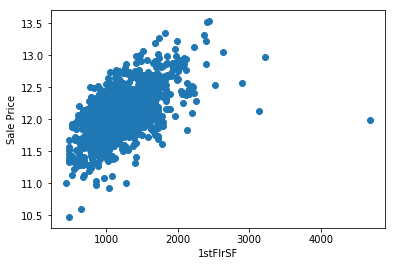

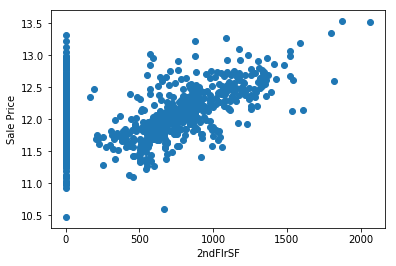

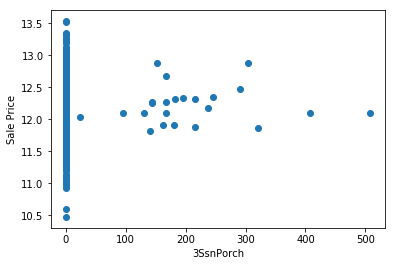

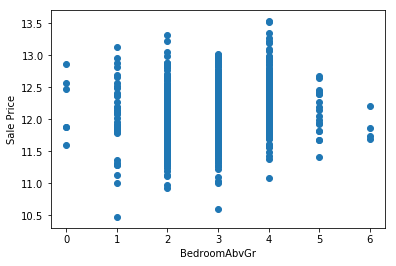

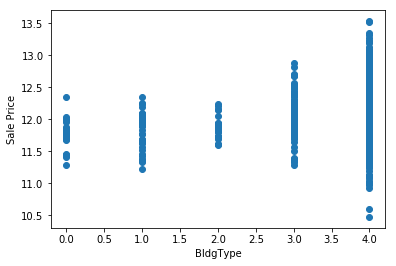

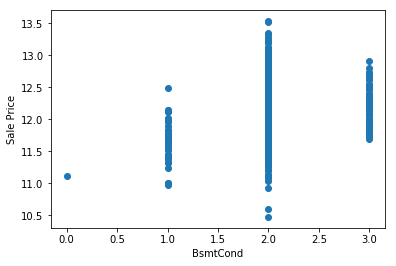

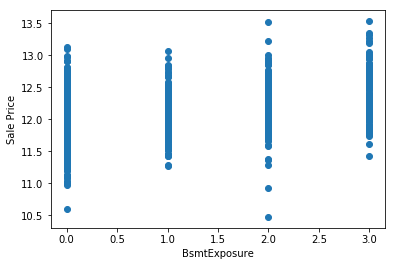

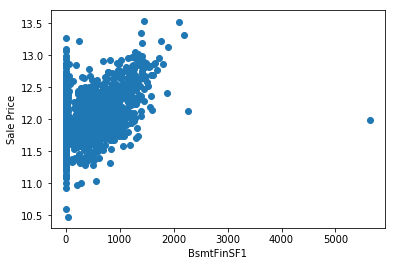

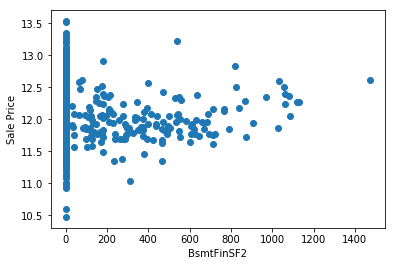

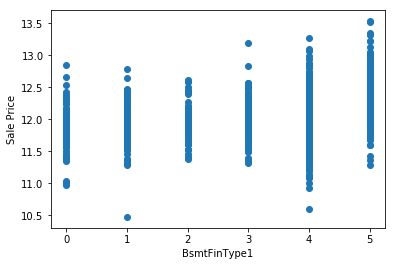

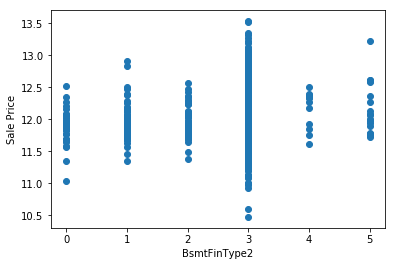

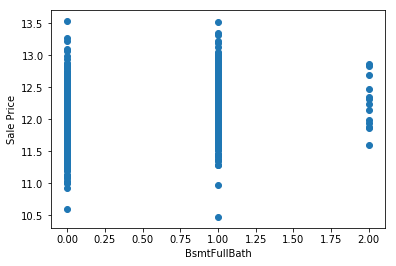

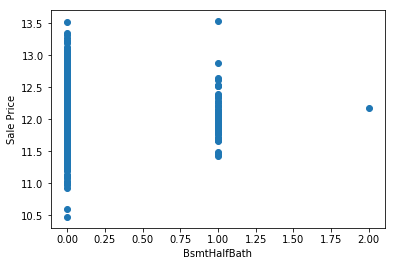

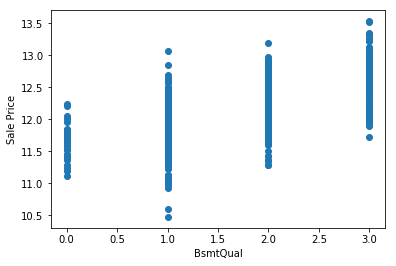

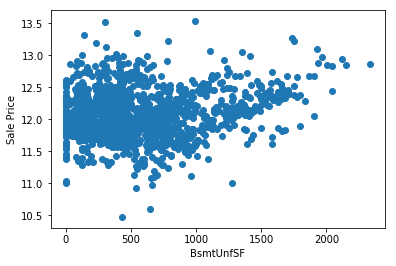

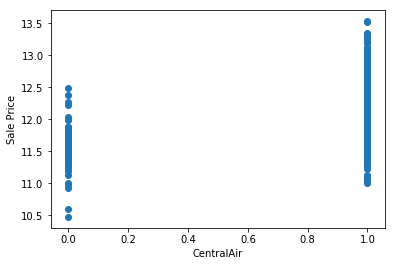

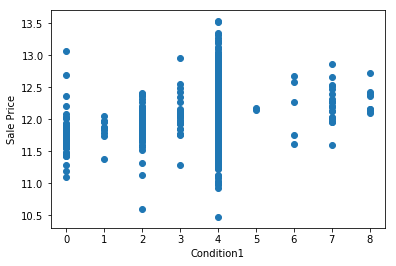

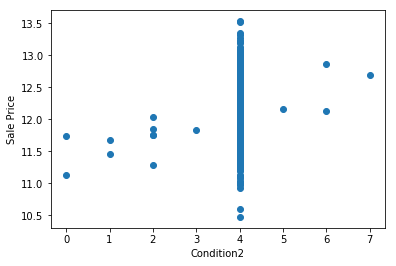

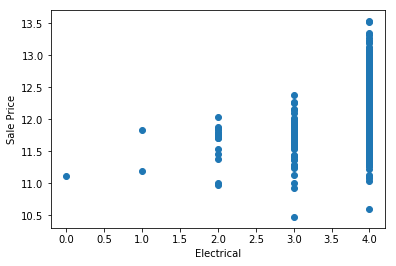

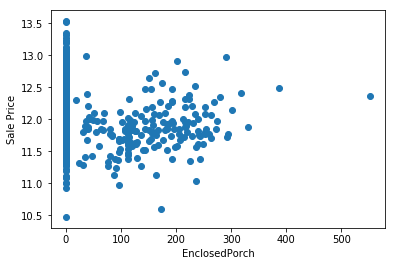

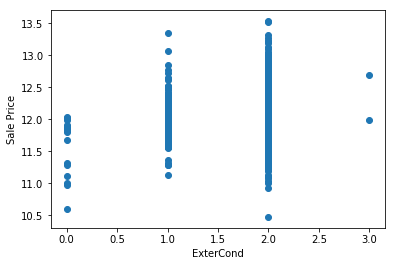

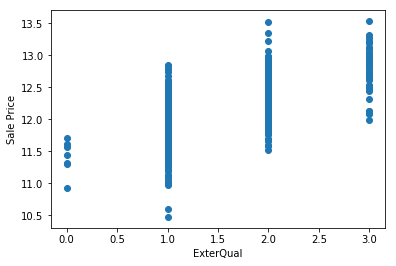

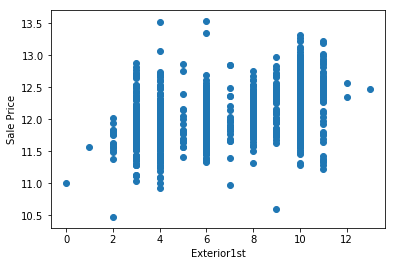

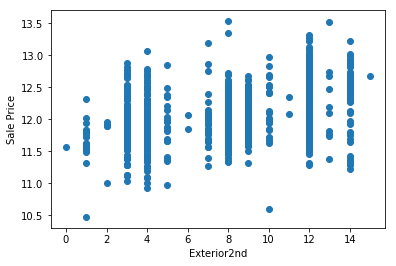

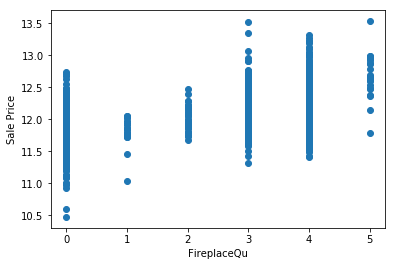

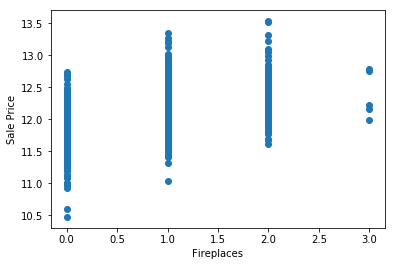

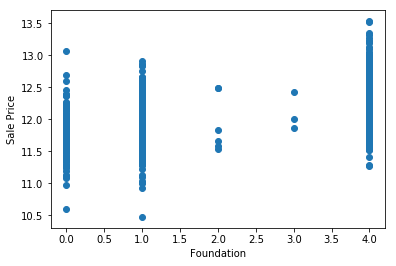

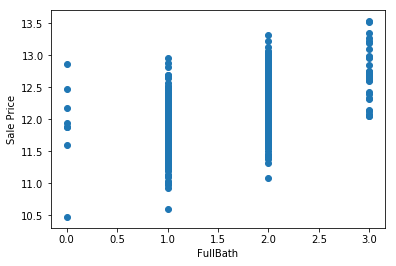

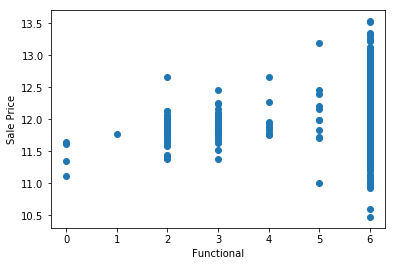

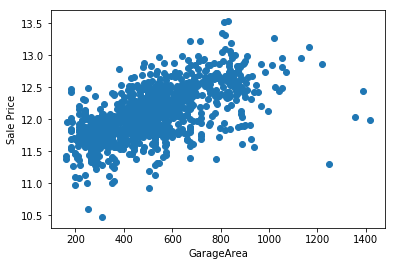

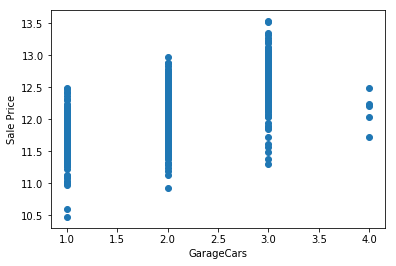

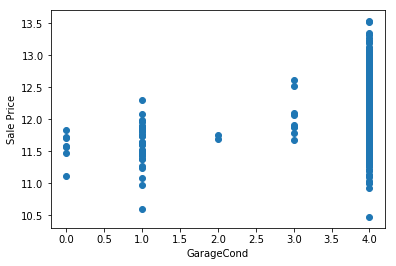

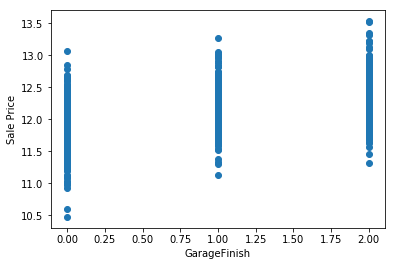

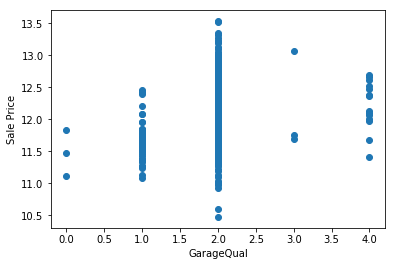

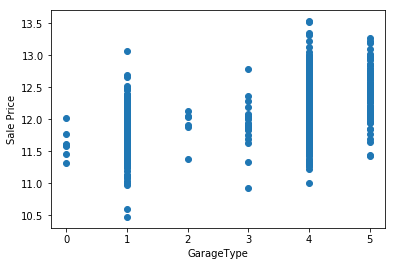

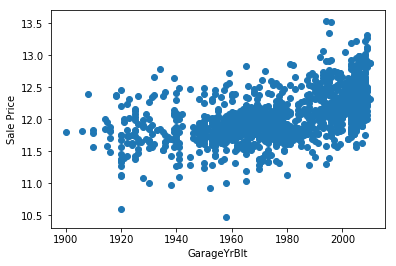

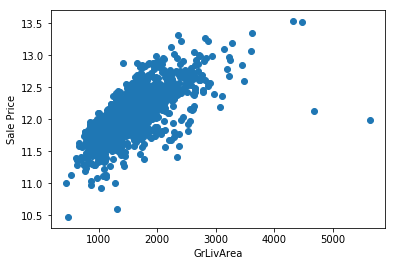

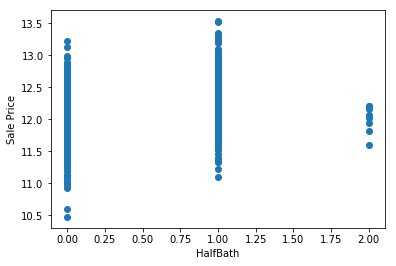

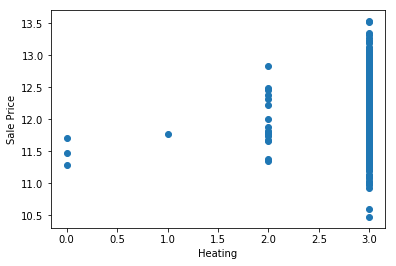

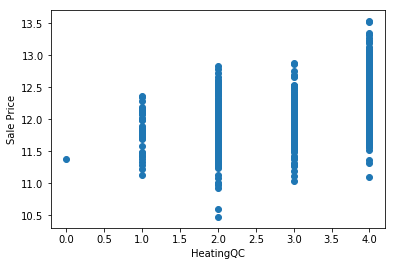

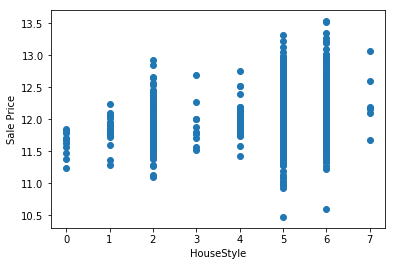

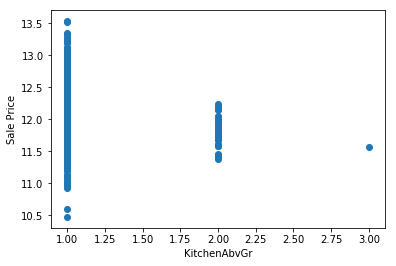

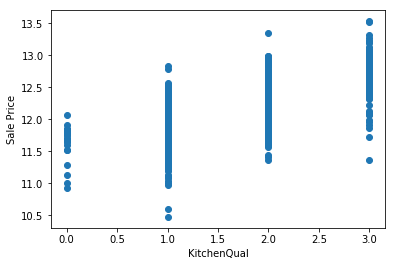

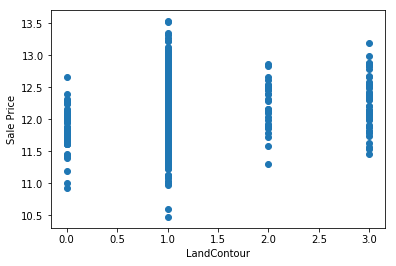

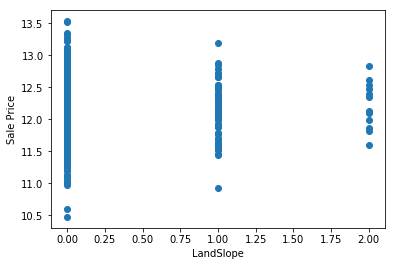

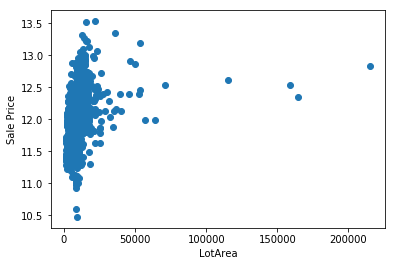

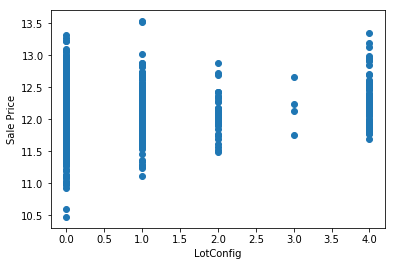

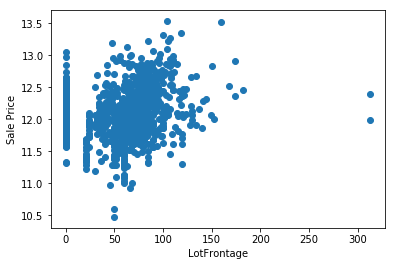

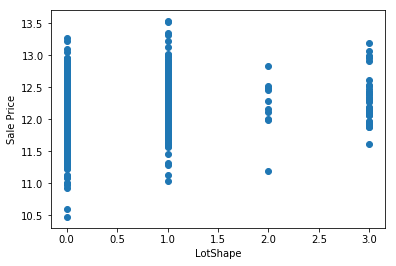

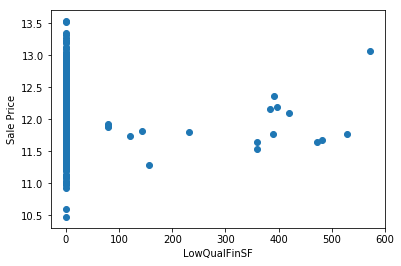

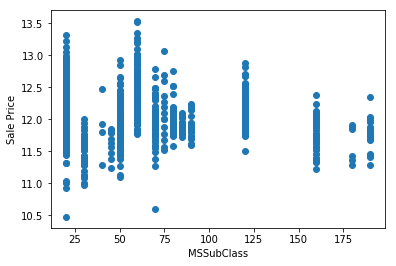

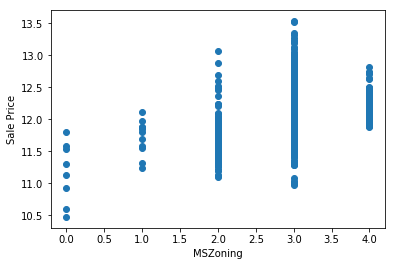

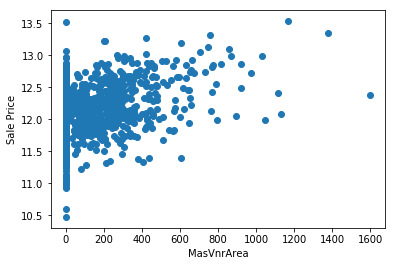

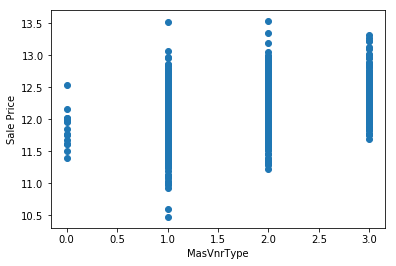

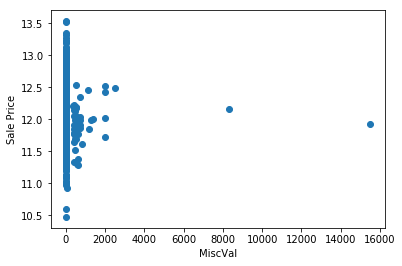

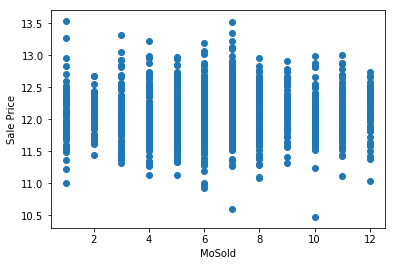

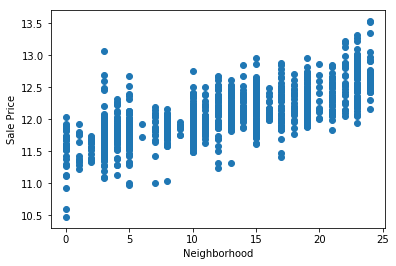

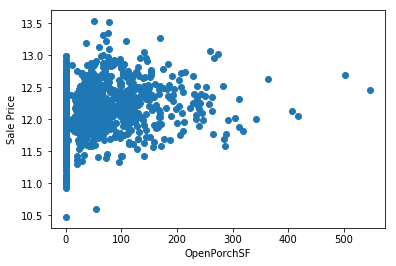

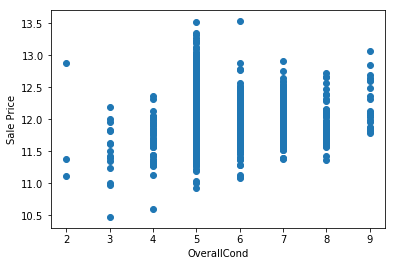

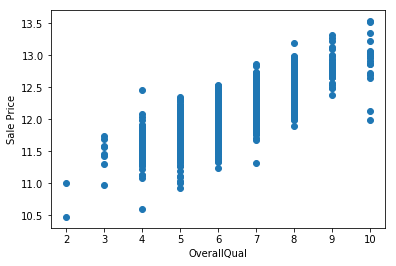

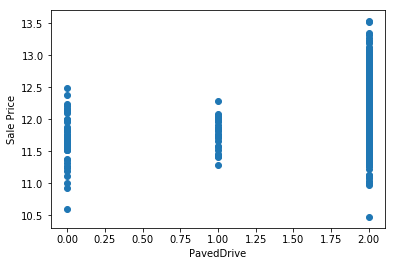

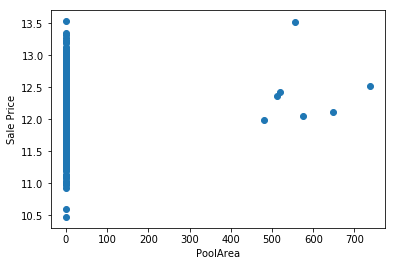

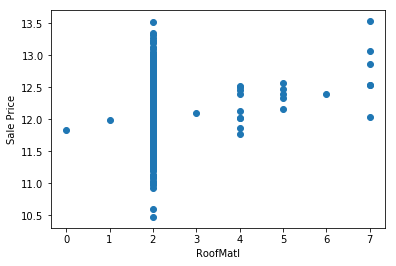

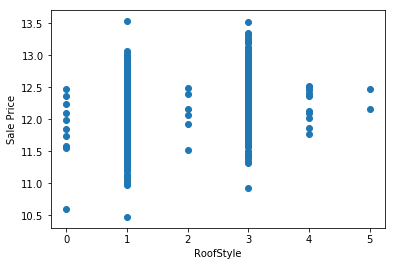

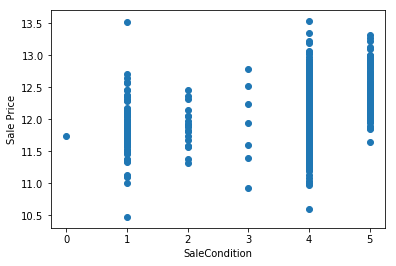

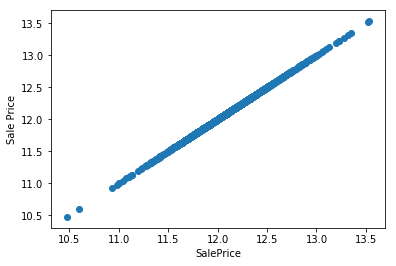

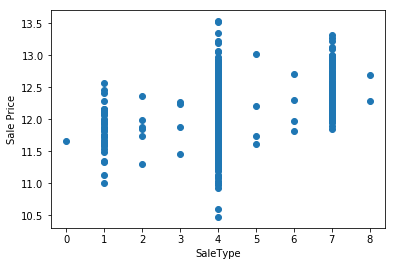

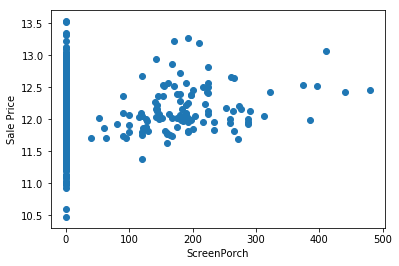

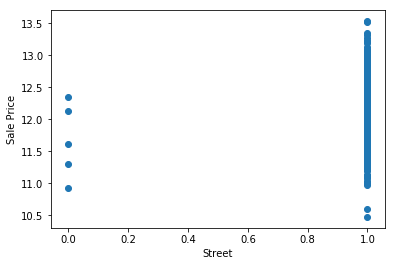

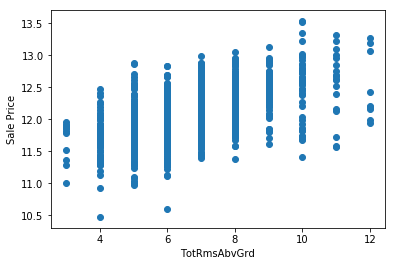

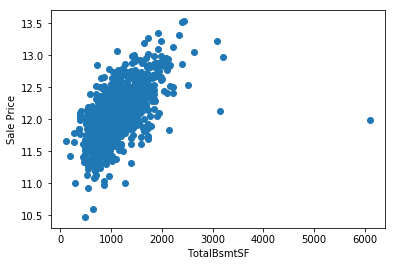

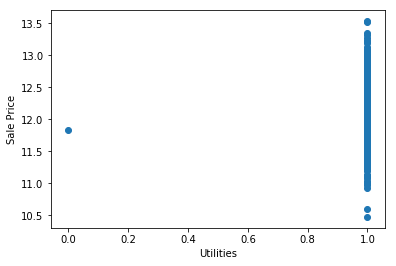

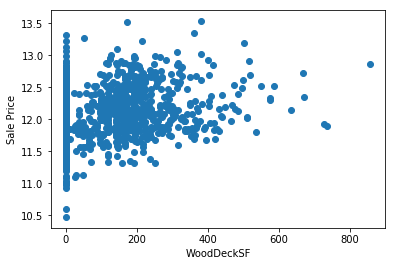

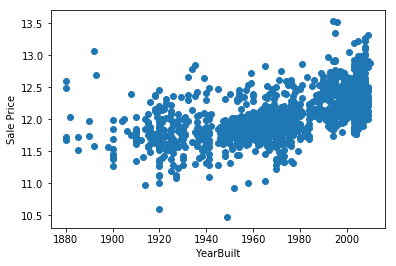

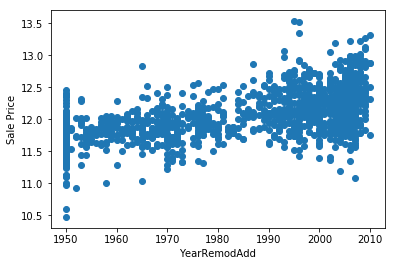

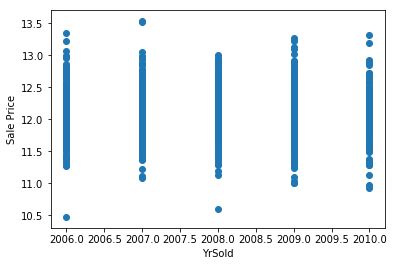

In [44]:
for item in out_col:
    plt.scatter(x=df_miss[item],y=df_miss['SalePrice'])
    plt.xlabel(item)
    plt.ylabel('Sale Price')
    plt.show()

### Remove Outliers

In [45]:
df_out=pd.DataFrame()
df_out=df_miss

In [46]:
df_out=df_out.drop(df_out[df_out['1stFlrSF']>3000].index)

In [47]:
df_out=df_out.drop(df_out[df_out['BsmtFinSF1']>5000].index)

In [48]:
df_out=df_out.drop(df_out[df_out['EnclosedPorch']>500].index)

In [49]:
df_out=df_out.drop(df_out[(df_out['GarageArea']>12000)&(df_out['SalePrice']<13.0)].index)

In [50]:
df_out=df_out.drop(df_out[(df_out['GrLivArea']>4000)&(df_out['SalePrice']<13.0)].index)

In [51]:
df_out=df_out.drop(df_out[df_out['TotalBsmtSF']>4000].index)

## Standardize all the continuous variables

In [52]:
scaler=StandardScaler()
array_out=scaler.fit_transform(df_out)

In [53]:
values=array_out
col=df_out.columns
df_out=pd.DataFrame(data=values,columns=col)

In [54]:
df_out.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.857498,1.137583,-0.118868,0.176715,0.354768,-0.059168,-0.652487,0.572407,-0.295972,1.009172,0.219484,1.097278,-0.249285,0.592091,-0.984269,0.218902,0.189757,0.056514,0.254085,-0.352673,0.337504,1.004891,0.993532,0.968493,-1.068822,-1.005438,1.059385,0.783799,0.240971,0.258534,0.204483,0.189002,0.217787,0.057823,0.570844,0.987603,0.362371,1.185465,0.108462,0.864026,0.858761,-0.171454,0.691510,-0.130103,-0.228662,-0.213799,-0.491151,0.216800,-0.672037,-0.100147,0.093423,0.25757,0.470115,0.733890,-0.084663,-1.609204,0.422273,0.212402,-0.555574,0.599233,0.244072,-0.060838,-0.114577,-0.504142,0.166171,0.491827,-0.156228,-0.283661,0.061337,0.929555,-0.623629,0.02739,-0.777804,1.015982,0.855850,0.144192
1,0.249690,-0.810582,-0.118868,0.176715,0.354768,-0.059168,2.210728,1.200213,-0.295972,-0.211350,0.219484,-0.849223,3.907547,0.592091,-0.678718,0.218902,-1.835333,0.056514,0.254085,-0.352673,0.337504,-0.740584,-1.428818,-1.429966,0.593605,0.550541,-0.807484,0.783799,0.240971,-0.217654,0.204483,0.189002,0.217787,0.057823,0.570844,-0.104720,-0.538072,-0.798738,0.108462,0.864026,0.124410,-0.171454,-0.843389,-0.130103,-0.228662,-0.101113,1.380837,0.654291,-0.672037,-0.100147,-0.875486,0.25757,-0.595403,-0.738304,-0.084663,-0.495974,1.213219,-0.735706,2.227162,-0.160631,0.244072,-0.060838,-0.114577,-0.504142,0.166171,0.123329,-0.156228,-0.283661,0.061337,-0.342919,0.463584,0.02739,1.559482,0.101461,-0.474233,-0.607185
2,-0.682966,1.164958,-0.118868,0.176715,0.354768,-0.059168,0.301918,0.064622,-0.295972,1.009172,0.219484,1.097278,-0.249285,0.592091,-0.336683,0.218902,0.189757,0.056514,0.254085,-0.352673,0.337504,1.004891,0.993532,0.968493,0.593605,0.550541,1.059385,0.783799,0.240971,0.583208,0.204483,0.189002,0.217787,0.057823,0.570844,0.906690,0.515125,1.185465,0.108462,0.864026,0.858761,-0.171454,0.691510,-0.130103,-0.228662,0.060568,-0.491151,0.304298,0.834681,-0.100147,0.093423,0.25757,0.285280,0.733890,-0.084663,0.988332,0.422273,-0.082910,-0.555574,0.599233,0.244072,-0.060838,-0.114577,-0.504142,0.166171,0.676423,-0.156228,-0.283661,0.061337,-0.342919,-0.452246,0.02739,-0.777804,0.948240,0.806588,0.144192
3,-0.571156,0.914024,-0.118868,0.176715,0.354768,3.528565,-0.652487,-0.558568,-0.295972,-0.211350,0.219484,1.097278,-0.249285,-0.873307,-0.094978,0.218902,0.189757,0.056514,0.254085,4.282453,0.337504,-0.740584,-1.082768,-0.363984,1.147747,0.550541,-1.429774,-1.050565,0.240971,0.767189,1.781248,0.189002,-1.013262,0.057823,-1.546411,0.785321,0.376441,-0.798738,0.108462,-0.195359,0.858761,-0.171454,0.691510,-0.130103,-0.228662,-0.106012,0.444843,0.070969,0.834681,-0.100147,0.335650,0.25757,-0.595403,-0.738304,-0.084663,-1.609204,0.738651,-0.191710,-0.555574,0.599233,0.244072,-0.060838,-0.114577,-0.504142,-3.371158,-0.566493,-0.156228,-0.283661,0.061337,0.293318,-0.891415,0.02739,-0.777804,-1.964679,-0.769807,-1.358561
4,-0.069377,1.591547,-0.118868,1.464899,0.354768,-0.059168,1.256323,0.454693,-0.295972,1.009172,0.219484,1.097278,-0.249285,0.592091,-0.208990,0.218902,0.189757,0.056514,0.254085,-0.352673,0.337504,1.004891,0.993532,0.968493,0.593605,0.550541,1.059385,0.783799,0.240971,1.816967,1.781248,0.189002,0.217787,0.0578

In [55]:
df_out['SalePrice'].isnull().sum()

0

In [56]:
df_out.describe().T

,count,mean,std,min,25%,50%,75%,max
1stFlrSF,1334.0,2.303671e-16,1.000375,-1.997410,-0.753869,-0.198912,0.662840,4.711164
2ndFlrSF,1334.0,2.929524e-17,1.000375,-0.810582,-0.810582,-0.810582,0.875243,3.900146
3SsnPorch,1334.0,1.065281e-17,1.000375,-0.118868,-0.118868,-0.118868,-0.118868,16.670109
BedroomAbvGr,1334.0,-3.728485e-17,1.000375,-3.687838,-1.111469,0.176715,0.176715,4.041268
BldgType,1334.0,-1.318286e-16,1.000375,-4.761565,0.354768,0.354768,0.354768,0.354768
BsmtCond,1334.0,-1.627883e-16,1.000375,-7.234634,-0.059168,-0.059168,-0.059168,3.528565
BsmtExposure,1334.0,-3.994805e-18,1.000375,-0.652487,-0.652487,-0.652487,1.256323,2.210728
BsmtFinSF1,1334.0,4.793767e-17,1.000375,-1.057121,-1.057121,-0.110795,0.632418,3.993029
BsmtFinSF2,1334.0,-3.595325e-17,1.000375,-0.295972,-0.295972,-0.295972,-0.295972,8.566139
BsmtFinType1,1334.0,2.663204e-17,1.000375,-2.042131,-0.821610,0.398911,1.009172,1.009172


(array([  2.,   6.,  32., 148., 437., 382., 215.,  89.,  17.,   6.]),
 array([-4.22652916, -3.41278178, -2.59903441, -1.78528703, -0.97153965,
        -0.15779227,  0.65595511,  1.46970249,  2.28344987,  3.09719725,
         3.91094463]),
 <a list of 10 Patch objects>)

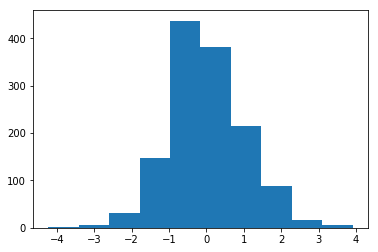

In [57]:
plt.hist(df_out['SalePrice'])

## Feature Selection

### 1. Filter Method - Correlation Coefficient

In [58]:
corr=df_out.corr()
corr.sort_values(["SalePrice"],ascending=False,inplace=True)
dc=corr.SalePrice

In [59]:
dc

SalePrice        1.000000
OverallQual      0.812396
Neighborhood     0.732535
GrLivArea        0.732456
ExterQual        0.678217
BsmtQual         0.667651
KitchenQual      0.664899
GarageCars       0.661892
TotalBsmtSF      0.633325
1stFlrSF         0.625085
GarageArea       0.620534
FullBath         0.612114
YearBuilt        0.575427
YearRemodAdd     0.567062
TotRmsAbvGrd     0.553759
GarageFinish     0.552925
GarageYrBlt      0.539944
Foundation       0.535184
FireplaceQu      0.526645
GarageType       0.506498
Fireplaces       0.473538
HeatingQC        0.465105
MasVnrArea       0.430245
Exterior1st      0.429596
MasVnrType       0.422561
Exterior2nd      0.420977
MSZoning         0.401005
BsmtFinType1     0.377190
BsmtFinSF1       0.360892
OpenPorchSF      0.352263
                   ...   
BedroomAbvGr     0.196663
LotFrontage      0.192947
BsmtUnfSF        0.190535
BsmtCond         0.186507
GarageQual       0.179698
LandContour      0.168679
BldgType         0.164668
LotConfig   

In [60]:
dc.index

Index(['SalePrice', 'OverallQual', 'Neighborhood', 'GrLivArea', 'ExterQual',
       'BsmtQual', 'KitchenQual', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd',
       'GarageFinish', 'GarageYrBlt', 'Foundation', 'FireplaceQu',
       'GarageType', 'Fireplaces', 'HeatingQC', 'MasVnrArea', 'Exterior1st',
       'MasVnrType', 'Exterior2nd', 'MSZoning', 'BsmtFinType1', 'BsmtFinSF1',
       'OpenPorchSF', 'BsmtExposure', 'SaleType', 'WoodDeckSF', '2ndFlrSF',
       'HouseStyle', 'HalfBath', 'LotShape', 'CentralAir', 'Electrical',
       'SaleCondition', 'LotArea', 'PavedDrive', 'BsmtFullBath', 'GarageCond',
       'RoofStyle', 'Condition1', 'BedroomAbvGr', 'LotFrontage', 'BsmtUnfSF',
       'BsmtCond', 'GarageQual', 'LandContour', 'BldgType', 'LotConfig',
       'RoofMatl', 'ExterCond', 'Functional', 'Condition2', 'BsmtFinType2',
       'ScreenPorch', 'Heating', 'PoolArea', 'Street', 'LandSlope',
       '3SsnPorch', 'MoSo

In [61]:
dc.values

array([ 1.        ,  0.81239602,  0.73253451,  0.73245563,  0.6782173 ,
        0.66765064,  0.664899  ,  0.66189193,  0.63332454,  0.62508526,
        0.62053445,  0.61211411,  0.57542715,  0.56706237,  0.55375914,
        0.5529246 ,  0.53994421,  0.53518418,  0.52664509,  0.50649841,
        0.47353801,  0.46510496,  0.43024495,  0.42959557,  0.42256107,
        0.42097655,  0.40100498,  0.37719035,  0.36089189,  0.35226341,
        0.34571313,  0.34532435,  0.31695824,  0.31115748,  0.2939231 ,
        0.28952057,  0.28339772,  0.27899265,  0.2671788 ,  0.26502857,
        0.2534835 ,  0.22420559,  0.21511318,  0.21236543,  0.21083403,
        0.20233882,  0.19666329,  0.1929472 ,  0.19053514,  0.18650742,
        0.17969783,  0.16867916,  0.16466761,  0.14492247,  0.13800527,
        0.13784369,  0.13344684,  0.11905878,  0.10950138,  0.1059548 ,
        0.07418511,  0.07248265,  0.06489977,  0.06133107,  0.05347113,
        0.05268903,  0.01682732, -0.0110527 , -0.0205252 , -0.02

In [62]:
dc.index.values

array(['SalePrice', 'OverallQual', 'Neighborhood', 'GrLivArea',
       'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageCars',
       'TotalBsmtSF', '1stFlrSF', 'GarageArea', 'FullBath', 'YearBuilt',
       'YearRemodAdd', 'TotRmsAbvGrd', 'GarageFinish', 'GarageYrBlt',
       'Foundation', 'FireplaceQu', 'GarageType', 'Fireplaces',
       'HeatingQC', 'MasVnrArea', 'Exterior1st', 'MasVnrType',
       'Exterior2nd', 'MSZoning', 'BsmtFinType1', 'BsmtFinSF1',
       'OpenPorchSF', 'BsmtExposure', 'SaleType', 'WoodDeckSF',
       '2ndFlrSF', 'HouseStyle', 'HalfBath', 'LotShape', 'CentralAir',
       'Electrical', 'SaleCondition', 'LotArea', 'PavedDrive',
       'BsmtFullBath', 'GarageCond', 'RoofStyle', 'Condition1',
       'BedroomAbvGr', 'LotFrontage', 'BsmtUnfSF', 'BsmtCond',
       'GarageQual', 'LandContour', 'BldgType', 'LotConfig', 'RoofMatl',
       'ExterCond', 'Functional', 'Condition2', 'BsmtFinType2',
       'ScreenPorch', 'Heating', 'PoolArea', 'Street', 'LandSlope',
       '3Ss

In [63]:
dc_new=dc[(dc.values>0.5)&(dc.values<1)]
dc_new

OverallQual     0.812396
Neighborhood    0.732535
GrLivArea       0.732456
ExterQual       0.678217
BsmtQual        0.667651
KitchenQual     0.664899
GarageCars      0.661892
TotalBsmtSF     0.633325
1stFlrSF        0.625085
GarageArea      0.620534
FullBath        0.612114
YearBuilt       0.575427
YearRemodAdd    0.567062
TotRmsAbvGrd    0.553759
GarageFinish    0.552925
GarageYrBlt     0.539944
Foundation      0.535184
FireplaceQu     0.526645
GarageType      0.506498
Name: SalePrice, dtype: float64

In [64]:
feature_col=dc_new.index.values
feature_col

array(['OverallQual', 'Neighborhood', 'GrLivArea', 'ExterQual',
       'BsmtQual', 'KitchenQual', 'GarageCars', 'TotalBsmtSF', '1stFlrSF',
       'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'GarageFinish', 'GarageYrBlt', 'Foundation',
       'FireplaceQu', 'GarageType'], dtype=object)

### Select the features to be used in the data analysis

In [65]:
X=df_out[sorted(feature_col)]
y=df_out['SalePrice']

In [66]:
X.head()

,1stFlrSF,BsmtQual,ExterQual,FireplaceQu,Foundation,FullBath,GarageArea,GarageCars,GarageFinish,GarageType,GarageYrBlt,GrLivArea,KitchenQual,Neighborhood,OverallQual,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,YearRemodAdd
0,-0.857498,0.592091,1.004891,-1.068822,1.059385,0.783799,0.258534,0.204483,0.217787,0.570844,0.987603,0.362371,0.691510,0.422273,0.599233,0.929555,-0.623629,1.015982,0.855850
1,0.249690,0.592091,-0.740584,0.593605,-0.807484,0.783799,-0.217654,0.204483,0.217787,0.570844,-0.104720,-0.538072,-0.843389,1.213219,-0.160631,-0.342919,0.463584,0.101461,-0.474233
2,-0.682966,0.592091,1.004891,0.593605,1.059385,0.783799,0.583208,0.204483,0.217787,0.570844,0.906690,0.515125,0.691510,0.422273,0.599233,-0.342919,-0.452246,0.948240,0.806588
3,-0.571156,-0.873307,-0.740584,1.147747,-1.429774,-1.050565,0.767189,1.781248,-1.013262,-1.546411,0.785321,0.376441,0.691510,0.738651,0.599233,0.293318,-0.891415,-1.964679,-0.769807
4,-0.069377,0.592091,1.004891,0.593605,1.059385,0.783799,1.816967,1.781248,0.217787,0.570844,0.866234,1.343211,0.691510,1.845975,1.359096,1.565792,0.150274,0.914369,0.708063


In [67]:
y.head()

0    0.491827
1    0.123329
2    0.676423
3   -0.566493
4    0.974151
Name: SalePrice, dtype: float64

## Modeling

### Specify testing size

In [68]:
TS=0.2

### Create a Result dataframe

In [69]:
result_col=['Algorithm','Correlation','Recursive','XGBoost']
result=pd.DataFrame(columns=result_col)
result['Algorithm']=['Ridge Regression','LASSO Regression','Elastic Net',
                     'Decision Tree','Random Forest','XGBoost']

In [70]:
result

,Algorithm,Correlation,Recursive,XGBoost
0,Ridge Regression,NaN,NaN,NaN
1,LASSO Regression,NaN,NaN,NaN
2,Elastic Net,NaN,NaN,NaN
3,Decision Tree,NaN,NaN,NaN
4,Random Forest,NaN,NaN,NaN
5,XGBoost,NaN,NaN,NaN


### Split the data to train and test dataset

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=200)

### Ridge Regression

In [72]:
print(plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (8,4)

[6.0, 4.0]


In [73]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=0.001,fit_intercept=True)
RR_fit=RR.fit(x_train,y_train)

In [74]:
y_pred=RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.3632091597313182

0.3141310962992652

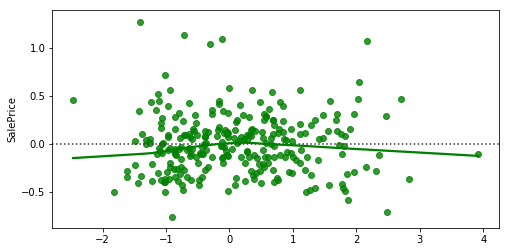

In [75]:
y_pred=RR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][0]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][0]

### Lasso Regression

In [76]:
from sklearn.linear_model import Lasso
LR=Lasso(alpha=0.001,fit_intercept=True)
LR_fit=LR.fit(x_train,y_train)
y_pred=LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.3632613553961779

0.3130718293290203

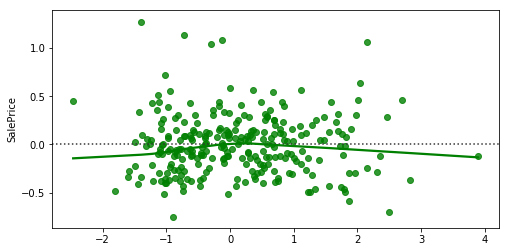

In [77]:
y_pred=LR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][1]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][1]

### Elastic Net Model

In [78]:
from sklearn.linear_model import ElasticNetCV
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
EN_fit=EN.fit(x_train, y_train)

In [79]:
y_pred=EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.36423747065967166

0.31084026913122703

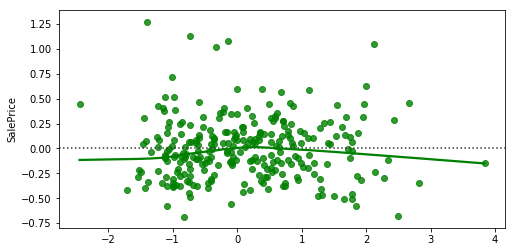

In [80]:
y_pred=EN_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][2]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][2]

### Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT_fit=DT.fit(x_train,y_train)

In [82]:
y_pred=DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.014217272908740265

0.535401671388594

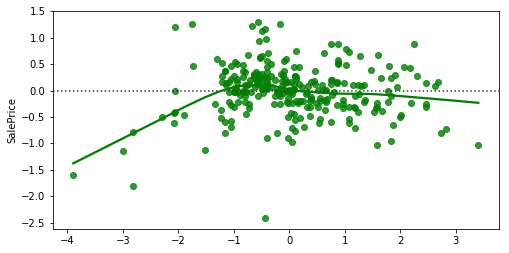

In [83]:
y_pred=DT_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][3]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][3]

### Random Forest Model

In [84]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RF_fit=RF.fit(x_train, y_train)

In [85]:
y_pred=RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.1471343746065449

0.3209429730969017

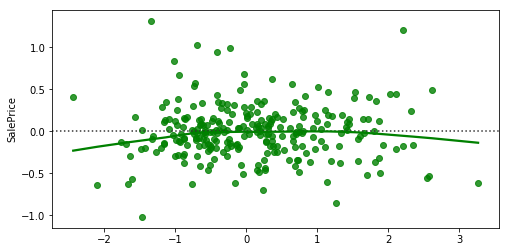

In [86]:
y_pred=RF_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][4]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][4]

### XGBoost Model

In [87]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
XG_fit=XG.fit(x_train, y_train)

In [88]:
y_pred=XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.12109639048912166

0.317223105082094

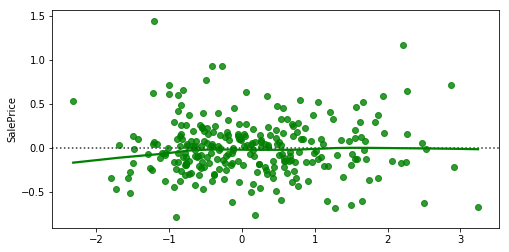

In [89]:
y_pred=XG_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Correlation'][5]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Correlation'][5]

### Wrapper Method - Recursive Feature Elimination Method

In [90]:
from sklearn.feature_selection import RFECV

### Split the data to train and test dataset

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=200)

### Ridge Regression

In [92]:
RR=Ridge(alpha=0.001,fit_intercept=True)
RM_RR=RFECV(RR, step=1, cv=20, scoring='neg_mean_squared_error')
RM_RR_fit=RM_RR.fit(x_train,y_train)
RM_RR_fit.n_features_

14

In [93]:
y_pred=RM_RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.3632788677433318

0.31339189112079324

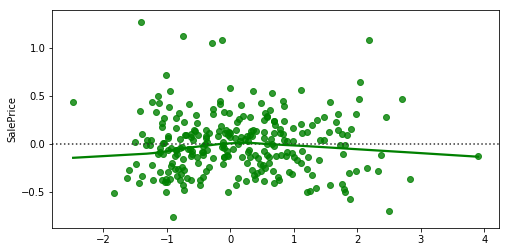

In [94]:
y_pred=RM_RR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][0]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][0]

### Lasso Regression

In [95]:
LR=Lasso(alpha=0.001,fit_intercept=True)
RM_LR=RFECV(LR, step=1, cv=20, scoring='neg_mean_squared_error')
RM_LR_fit=RM_LR.fit(x_train,y_train)
RM_LR_fit.n_features_

14

In [96]:
y_pred=RM_LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.3633134875064921

0.3126856557562005

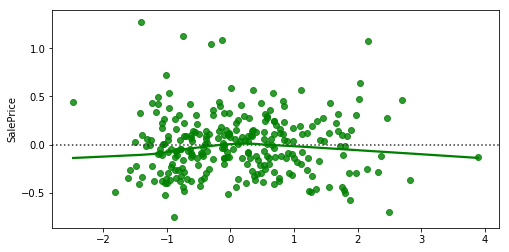

In [97]:
y_pred=RM_LR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][1]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][1]

### Elastic Net Model

In [98]:
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
RM_EN=RFECV(EN, step=1, cv=20, scoring='neg_mean_squared_error')
RM_EN_fit=RM_EN.fit(x_train,y_train)
RM_EN_fit.n_features_

14

In [99]:
y_pred=RM_EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.3633387578670674

0.3126294380258631

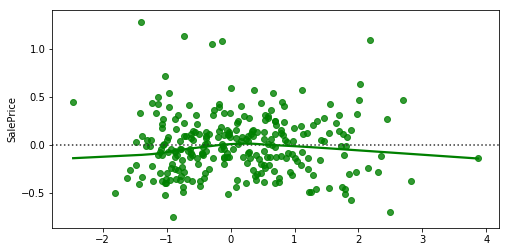

In [100]:
y_pred=RM_EN_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][2]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][2]

### Decision Tree Model

In [101]:
DT=DecisionTreeRegressor()
RM_DT=RFECV(DT, step=1, cv=20, scoring='neg_mean_squared_error')
RM_DT_fit=RM_DT.fit(x_train,y_train)
RM_DT_fit.n_features_

15

In [102]:
y_pred=RM_DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.014465731091714751

0.5344669634259877

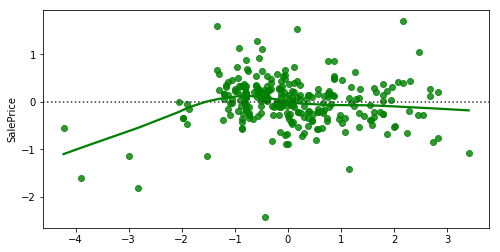

In [103]:
y_pred=RM_DT_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][3]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][3]

### Random Forest Model

In [104]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RM_RF=RFECV(RF, step=1, cv=10, scoring='neg_mean_squared_error')
RM_RF_fit=RM_RF.fit(x_train,y_train)
RM_RF_fit.n_features_

18

In [105]:
y_pred=RM_RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

0.14686028343011148

0.31995393149251694

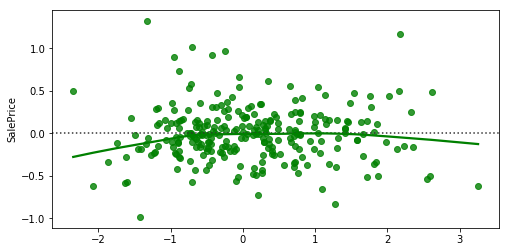

In [106]:
y_pred=RM_RF_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][4]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][4]

### XGBoost Model

In [ ]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=300, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
RM_XG=RFECV(XG, step=1, cv=5, scoring='neg_mean_squared_error')
RM_XG_fit=RM_XG.fit(x_train,y_train)
RM_XG_fit.n_features_

In [ ]:
y_pred=RM_XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

In [ ]:
y_pred=RM_XG_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['Recursive'][5]=np.sqrt(mean_squared_error(y_pred,y_test))
result['Recursive'][5]

## Embedded Method - XGBoost Feature Importance

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
df_out_X=df_out.drop(columns=['SalePrice'])
df_out_y=df_out['SalePrice']
model.fit(df_out_X, df_out_y)
print(model.feature_importances_)

In [ ]:
len(model.feature_importances_)

In [ ]:
df_out_X.shape

In [ ]:
df_out_X_col=df_out_X.columns.values

In [ ]:
plt.rcParams["figure.figsize"] = (10,20)
plt.barh(df_out_X_col, model.feature_importances_)
plt.show()

In [ ]:
df_XG=pd.DataFrame()

In [ ]:
df_XG['Feature']=df_out_X_col
df_XG['Feature_Importance']=model.feature_importances_

In [ ]:
df_XG.head()

In [ ]:
df_XG=df_XG.sort_values(by=['Feature_Importance'],ascending=False)

In [ ]:
df_XG

In [ ]:
feature_col_XG=df_XG['Feature'][:12].values

In [ ]:
feature_col_XG

### Using the new selected features in the 6 models again.

In [ ]:
X=df_out[feature_col_XG]
y=df_out['SalePrice']

In [ ]:
feature_col_XG

### Split the data to train and test dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=TS, random_state=200)

### Ridge Regression

In [ ]:
plt.rcParams["figure.figsize"] = (8,4)

In [ ]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=0.0001,fit_intercept=True)
RR_fit=RR.fit(x_train,y_train)
y_pred=RR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

In [ ]:
y_pred=RR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][0]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][0]

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
LR=Lasso(alpha=0.0001,fit_intercept=True)
LR_fit=LR.fit(x_train,y_train)
y_pred=LR_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

In [ ]:
y_pred=LR_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][1]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][1]

### Elastic Net Model

In [ ]:
from sklearn.linear_model import ElasticNetCV
EN = ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                       l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000)
EN_fit=EN.fit(x_train, y_train)

In [ ]:
y_pred=EN_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

In [ ]:
y_pred=EN_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][2]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][2]

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
DT_fit=DT.fit(x_train,y_train)

In [ ]:
y_pred=DT_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

In [ ]:
y_pred=DT_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][3]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][3]

### Random Forest Model

In [ ]:
RF = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
RF_fit=RF.fit(x_train, y_train)

In [ ]:
y_pred=RF_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

In [ ]:
y_pred=RF_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][4]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][4]

### XGBoost Model

In [ ]:
XG = ensemble.GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000, max_depth=10, 
                                  max_features='sqrt', min_samples_leaf=15, 
                                  min_samples_split=10)
XG_fit=XG.fit(x_train, y_train)

In [ ]:
y_pred=XG_fit.predict(x_train)
np.sqrt(mean_squared_error(y_pred,y_train))

In [ ]:
y_pred=XG_fit.predict(x_test)
y_err=y_pred-y_test
sns.residplot(y_pred,y_err,lowess=True,color="g")
result['XGBoost'][5]=np.sqrt(mean_squared_error(y_pred,y_test))
result['XGBoost'][5]

## Examine the result

In [ ]:
print('test-size: ',TS)

In [ ]:
result